# 피마 인디언 당뇨병 데이터

- 데이터 활용 목적 : 당뇨병 여부를 판단하는 머신러능 예측 모델을 개발
- 데이터 개요
    - 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터
    - 일반적으로 알려진 당뇨병의 원인은 식습관과 유전
        - 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속됨
        - 20세기 후반 서구화된 식습관으로 많은 당뇨 환자가 발생
        
    - 피처
        - Pregnancies : 임신 횟수
        - Glucose : 포도당 부하 검사 수치
        - BloodPressure : 혈압(mm Hg)
        - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
        - Insulin : 혈청 인슐린(mm U/ml)
        - BMI : 체질량 지수(체중(kg) / 키(m))^2
        - DiabetesPedigreeFuction : 당뇨 내력 가중치 값
        - Age : 나이
        - Outcome : 클래스 결정 값(0 또는 1)

In [462]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Binarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./data/diabetes.csv")

# 데이터 확인

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- 결측치 없음

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


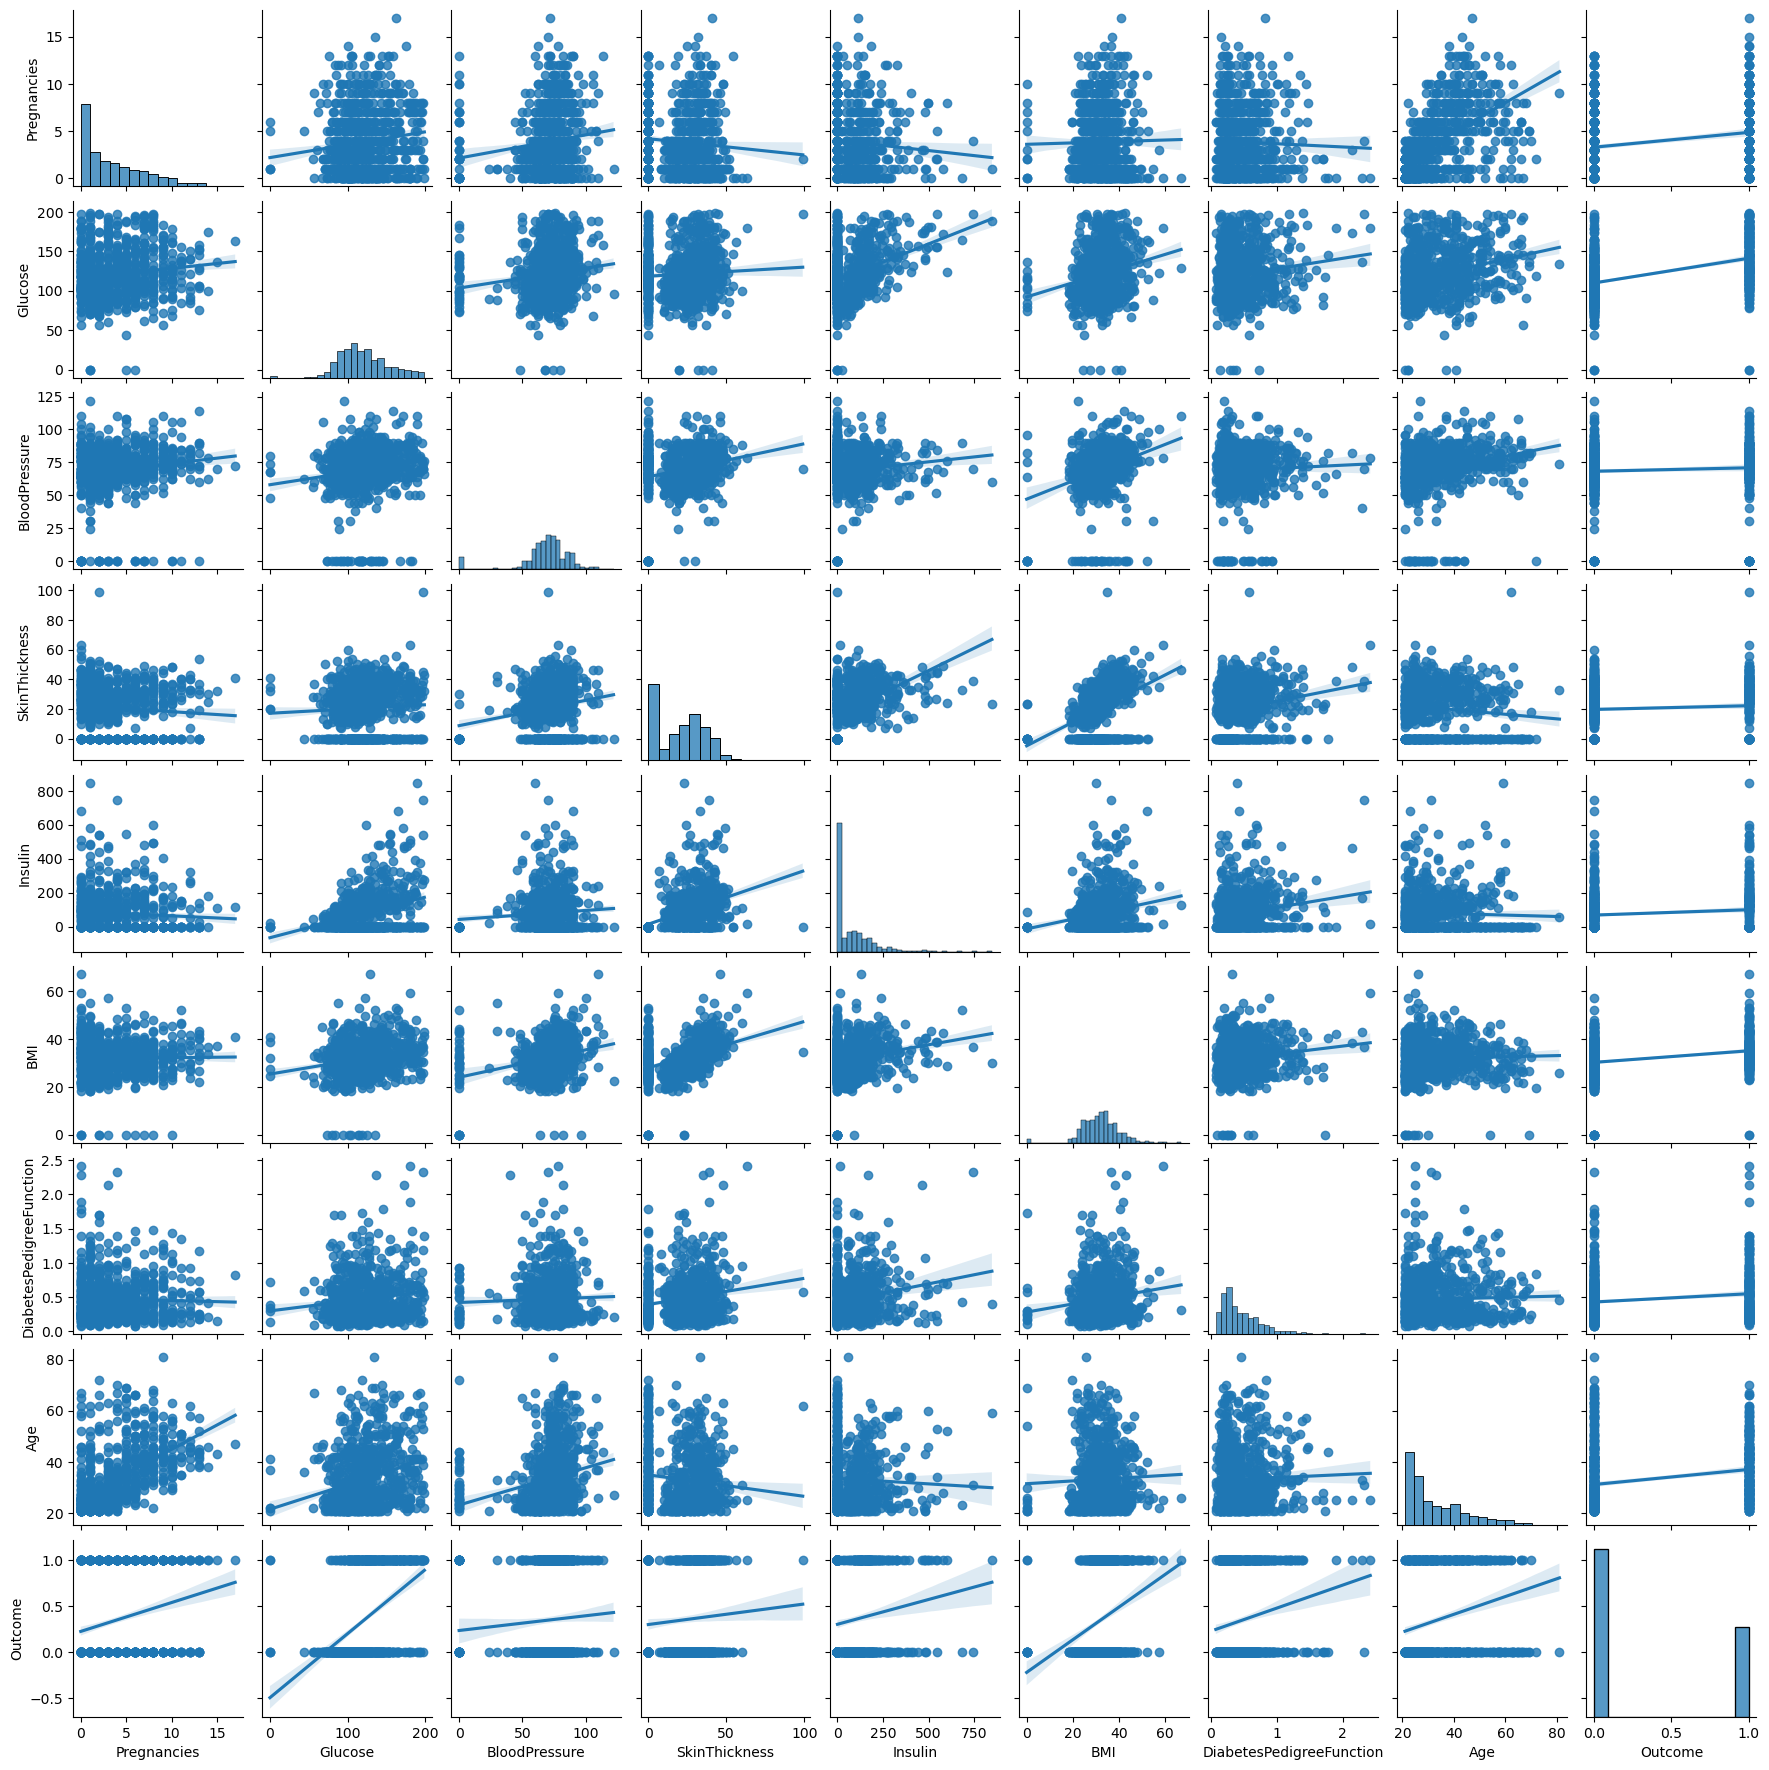

In [9]:
sns.pairplot(df, kind='reg', height = 2)

# 데이터 상관계수 확인

In [10]:
df_corr = df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


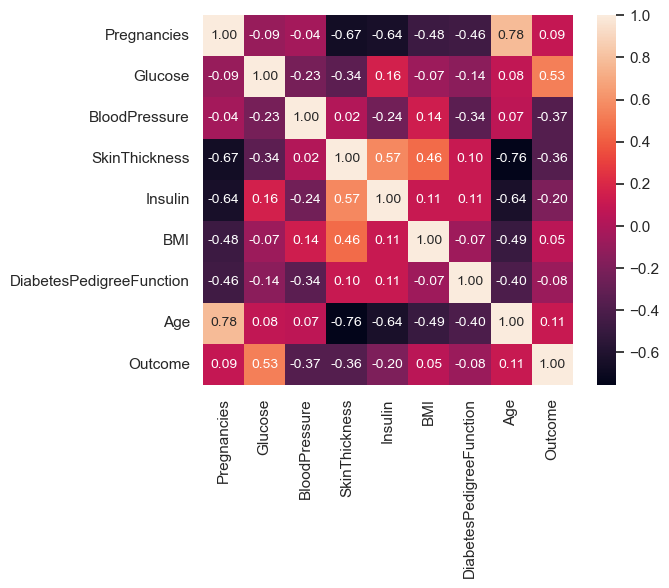

In [11]:
# 상관계수 시각화
corr_mat = np.corrcoef(df_corr.values.T)
sns.set()
full_mat = sns.heatmap(corr_mat, cbar = True, annot = True, square = True, fmt = ".2f",
                      annot_kws = {"size" : 10}, yticklabels = df_corr,
                      xticklabels = df_corr)
plt.show()

- Glucose 값이 상관성이 높음
- BloodPressure, SkinThickness 값이 상관성이 낮음

# Outcome 컬럼 확인

In [12]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

- 0(Negative) 값이 500으로 1(Positive) 값보다 많음

# df.describe의 min 값이 0인 컬럼 확인

- "Pregnancies"의 경우 임신을 하지 않은 사람이 있을 수 있으므로 min값이 0이 될 수 있음

In [13]:
zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = df['Glucose'].count()
for feature in zero:
    zero_count = df[df[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


- SkinThickness와 Insulin의 0값이 높으므로 제거 또는 평균값을 대체할 필요가 있음

In [14]:
zero_mean = df[zero].mean()
df[zero] = df[zero].replace(0, zero_mean)

In [15]:
zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = df['Glucose'].count()
for feature in zero:
    zero_count = df[df[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


- 0 값이 대체된 것을 확인할 수 있음

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- "Pregnancies", "Outcome" 제외 min값이 0에서 변환됨

In [17]:
dfnew_corr = df.corr()
dfnew_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


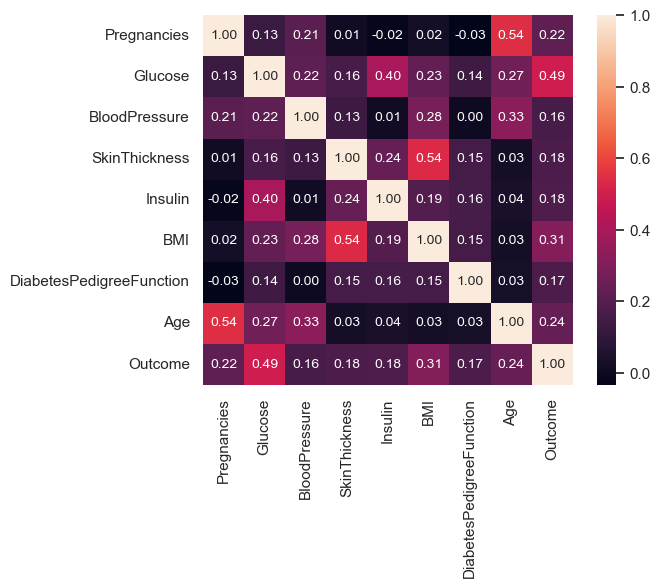

In [18]:
# 상관계수 시각화
corr_mat = np.corrcoef(dfnew_corr.values.T)
sns.set()
full_mat = sns.heatmap(dfnew_corr, cbar = True, annot = True, square = True, fmt = ".2f",
                      annot_kws = {"size" : 10}, yticklabels = df_corr,
                      xticklabels = df_corr)
plt.show()

# 강사님 풀이

In [425]:
# 평가지표 출력하는 함수 
def get_clf_eval(y_test, pred = None, pred_proba = None):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    F1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba)
    
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}' .format(auc))

## baseline 모델

In [426]:
x = df.iloc[:, :-1] # 독립변수 # "Outcomes" 컬럼 제외
y = df.iloc[:, -1] # 종속변수, "Outcomes" 컬럼 추출

In [427]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y,
                                                   random_state = 11)

In [428]:
print(x_train.shape, x_test.shape)

(614, 8) (154, 8)


In [429]:
# baseline 로지스틱 회귀

In [430]:
lr_clf1 = LogisticRegression(random_state = 11)
lr_clf1.fit(x_train, y_train)
pred1 = lr_clf1.predict(x_test)
pred_proba1 = lr_clf1.predict_proba(x_test)[:,1]

In [431]:
get_clf_eval(y_test, pred1, pred_proba1)

정확도: 0.7662
정밀도: 0.7250
재현율: 0.5370
F1: 0.6170
AUC: 0.8469


- 정밀도 : 맞춘확률
- 재현율 : % 예측

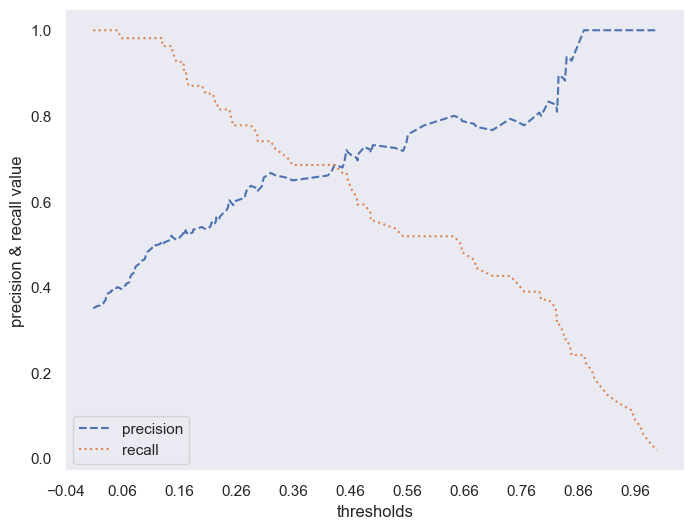

In [432]:
pred_proba_c1 = lr_clf1.predict_proba(x_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

- 임곗값이 대략 0.44  정도에서 정밀도와 재현율이 균현을 맞출 것으로 보임
- 점수를 더 높이기 위해 데이터 전처리 수행

## 데이터 전처리

In [433]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 데이터 값이 최솟값이 0인 피처가 존재
    - 포도당, 혈압, 피하지방, 인슐린, BMI가 0인 것은 납득하기 어려움

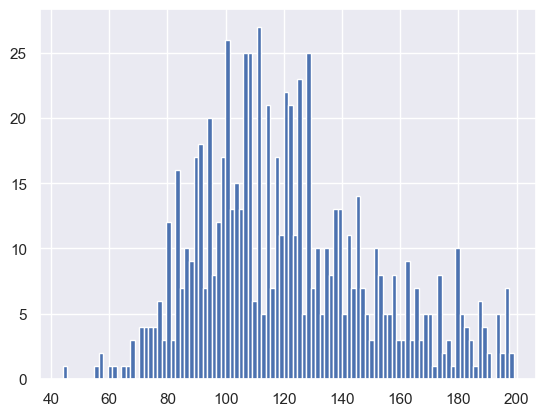

In [434]:
plt.hist(df["Glucose"], bins = 100)
plt.show()

- 포도당이 0인 데이터가 5개 존재

In [435]:
# 0값을 검사할 피처면 리스트
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [436]:
# 전체 데이터 건수
total_count = df["Glucose"].count()

In [437]:
# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출하고, 비율 계산
for feature in zero_features:
    zero_count = df[df[feature] == 0][feature].count()
    print(f"{feature} 0 건수는 {zero_count}, 비율은 {100 * zero_count / total_count:.2f})")

Glucose 0 건수는 0, 비율은 0.00)
BloodPressure 0 건수는 0, 비율은 0.00)
SkinThickness 0 건수는 0, 비율은 0.00)
Insulin 0 건수는 0, 비율은 0.00)
BMI 0 건수는 0, 비율은 0.00)


- SkinThickness 와 Insulin의 값 비율이 꽤 높은 편이어서 데이터 일괄 삭제 시 오히려 모델 학습에 악영향을 줄 수 있음
    - 이상치를 평균값으로 대체

In [438]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균값으로 대체
mean_zero_features =  df[feature].mean()
mean_zero_features

32.4508051554362

In [439]:
df[zero_features] = df[zero_features].replace(0, mean_zero_features)

In [440]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 모델 학습 테스트

In [441]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [442]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y,
                                                   random_state = 11)

In [443]:
# StandardScaler 를 통해 스케일링 적용
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [444]:
# 로지스틱 회귀 학습, 예측, 평가
lr_clf2 = LogisticRegression(random_state = 11)
lr_clf2.fit(scaled_train, y_train)
pred2 = lr_clf2.predict(scaled_test)
pred_proba2 = lr_clf2.predict_proba(scaled_test)[:, 1]

In [445]:
get_clf_eval(y_test, pred2, pred_proba2)

정확도: 0.7597
정밀도: 0.7073
재현율: 0.5370
F1: 0.6105
AUC: 0.8461


In [446]:
lr = LogisticRegression(random_state = 11)

param = {"penalty" : ["l1", "l2", "elesticent", None],
        "C" : [0.01, 0.1, 1, 10, 100],
        "solver" : ["lbfgs", "liblinear", "newtown-cg", "newtown-cholesky", "sag", "sega"]}

splitter = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

gs = GridSearchCV(lr, param, scoring = "roc_auc", cv = splitter, n_jobs = -1)
gs.fit(scaled_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=LogisticRegression(random_state=11), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elesticent', None],
                         'solver': ['lbfgs', 'liblinear', 'newtown-cg',
                                    'newtown-cholesky', 'sag', 'sega']},
             scoring='roc_auc')

In [447]:
gs.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [448]:
lr_clf3 = gs.best_estimator_

In [449]:
pred3 = lr_clf3.predict(scaled_test)
pred_proba3 = lr_clf3.predict_proba(scaled_test)[:, 1]

In [450]:
get_clf_eval(y_test, pred3, pred_proba3)

정확도: 0.7727
정밀도: 0.7209
재현율: 0.5741
F1: 0.6392
AUC: 0.8400


## 모델 성능 평가

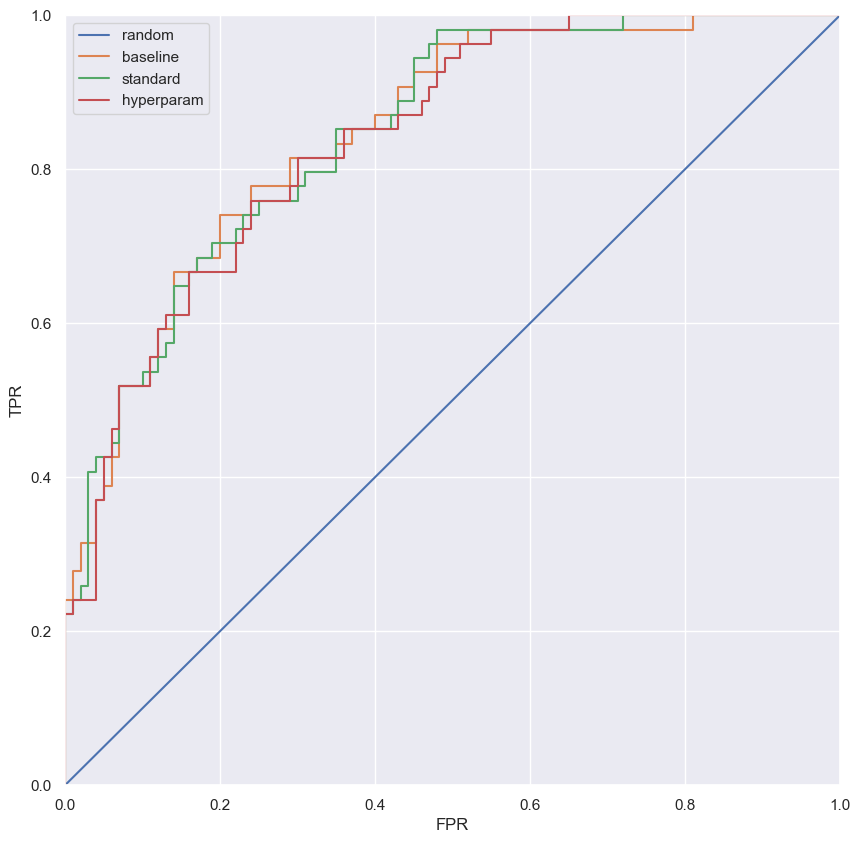

In [451]:
fpr1, tpr1, threshold1 = roc_curve(y_test, pred_proba1)
fpr2, tpr2, threshold2 = roc_curve(y_test, pred_proba2)
fpr3, tpr3, threshold3 = roc_curve(y_test, pred_proba3)

plt.figure(figsize = (10, 10))

plt.plot([0, 1], [0, 1], label = "random")
plt.plot(fpr1, tpr1, label = "baseline")
plt.plot(fpr2, tpr2, label = "standard")
plt.plot(fpr3, tpr3, label = "hyperparam")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

In [482]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds 리스트 내의 값을 차례로 반복하면서 검증
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold)
        binarizer.fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("암곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)
        print("-" * 80)

In [483]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]

In [484]:
get_eval_by_threshold(y_test, pred_proba1.reshape(-1, 1), thresholds)

암곗값: 0.3
정확도: 0.7597
정밀도: 0.6349
재현율: 0.7407
F1: 0.6838
AUC: 0.8469
--------------------------------------------------------------------------------
암곗값: 0.33
정확도: 0.7662
정밀도: 0.6552
재현율: 0.7037
F1: 0.6786
AUC: 0.8469
--------------------------------------------------------------------------------
암곗값: 0.36
정확도: 0.7662
정밀도: 0.6607
재현율: 0.6852
F1: 0.6727
AUC: 0.8469
--------------------------------------------------------------------------------
암곗값: 0.39
정확도: 0.7662
정밀도: 0.6607
재현율: 0.6852
F1: 0.6727
AUC: 0.8469
--------------------------------------------------------------------------------
암곗값: 0.42
정확도: 0.7662
정밀도: 0.6607
재현율: 0.6852
F1: 0.6727
AUC: 0.8469
--------------------------------------------------------------------------------
암곗값: 0.45
정확도: 0.7857
정밀도: 0.7059
재현율: 0.6667
F1: 0.6857
AUC: 0.8469
--------------------------------------------------------------------------------
암곗값: 0.48
정확도: 0.7792
정밀도: 0.7273
재현율: 0.5926
F1: 0.6531
AUC: 0.8469
--------------------------------

In [485]:
# 임곗값을 0.39로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.39)
pred_th = binarizer.fit_transform(pred_proba1.reshape(-1, 1))

In [487]:
get_clf_eval(y_test, pred_th, pred_proba1)

정확도: 0.7662
정밀도: 0.6607
재현율: 0.6852
F1: 0.6727
AUC: 0.8469


# 실습

## 피처스케일링

### 1. min값 0을 평균값으로 대체

In [386]:
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [387]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y,
                                                   random_state = 11)

In [388]:
print(x_train.shape, x_test.shape)

(614, 8) (154, 8)


In [389]:
ss = StandardScaler()
ss_scaled_train = ss.fit_transform(x_train)
ss_scaled_test = ss.transform(x_test)

In [390]:
mm = MinMaxScaler()
mm_scaled_train = mm.fit_transform(x_train)
mm_scaled_test = mm.transform(x_test)

In [391]:
ru = RobustScaler()
ru_scaled_train = ru.fit_transform(x_train)
ru_scaled_test = ru.transform(x_test)

In [392]:
new_x = sm.add_constant(x)
model = sm.Logit(y, new_x)
model = model.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.463109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.2840
Time:                        16:44:45   Log-Likelihood:                -355.67
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.580e-56
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.0984      0.812    -11.201      0.000     -10.690      -7.506
Pregnancies                  0.1249      0.032      3.847      0.000       0.061       0.189
Glucose                      0.0385      0.004      9.841      0.000       0.031       0.046
BloodPressure               -0.0110      0.009     -1.275      0.202      -0.028       0.006
SkinThickness               -0.0029      0.011     -0.252      0.801      -0.025       0.020
Insulin                     -0.0015      0.001     -1.392      0.164      -0.004       0.001
BMI                          0.1003      0.018      5.686      0.000       0.066       0.135
DiabetesPedigreeFunction     0.9030      0.299      3.024      0.002       0.318       1.488
Age                          0.0130      0.009      1.370      0.171      -0.006       0.032
============================================================================================
"""

-  P-value = >0.05 : "SkinTickness", "BloodPressure", "Insulin", "Age"

### 2. "SkinThickness", "BloodPressure", "Insulin", "Age" 컬럼 제거

In [407]:
x1 = df.drop(["Outcome", "SkinThickness", "BloodPressure", "Insulin", "Age"], axis = 1)
y1 = df["Outcome"]

In [410]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, stratify = y,
                                                   random_state = 11)

In [411]:
ss = StandardScaler()
ss1_scaled_train = ss.fit_transform(x1_train)
ss1_scaled_test = ss.transform(x1_test)

In [412]:
mm = MinMaxScaler()
mm1_scaled_train = mm.fit_transform(x1_train)
mm1_scaled_test = mm.transform(x1_test)

In [413]:
ru = RobustScaler()
ru1_scaled_train = ru.fit_transform(x1_train)
ru1_scaled_test = ru.transform(x1_test)

# 로지스틱회귀


## 모델 훈련

### 1. min값 0을 평균값으로 대체

In [393]:
lr_ss = LogisticRegression(random_state = 11)
lr_ss.fit(ss_scaled_train, y_train)

LogisticRegression(random_state=11)

In [394]:
lr_mm = LogisticRegression(random_state = 11)
lr_mm.fit(mm_scaled_train, y_train)

LogisticRegression(random_state=11)

In [395]:
lr_ru = LogisticRegression(random_state = 11)
lr_ru.fit(ru_scaled_train, y_train)

LogisticRegression(random_state=11)

### 2. "SkinThickness", "BloodPressure", "Insulin", "Age" 컬럼 제거

In [414]:
lr_ss1 = LogisticRegression(random_state = 11)
lr_ss1.fit(ss1_scaled_train, y1_train)

LogisticRegression(random_state=11)

In [415]:
lr_mm1 = LogisticRegression(random_state = 11)
lr_mm1.fit(mm1_scaled_train, y1_train)

LogisticRegression(random_state=11)

In [416]:
lr_ru1 = LogisticRegression(random_state = 11)
lr_ru1.fit(ru1_scaled_train, y1_train)

LogisticRegression(random_state=11)

### 1. min값 0을 평균값으로 대체

In [396]:
ss_pred = lr_ss.predict(ss_scaled_test)
mm_pred = lr_mm.predict(mm_scaled_test)
ru_pred = lr_ru.predict(ru_scaled_test)

In [417]:
ss_pp= lr_ss.predict_proba(ss_scaled_test)[:,1]
mm_pp = lr_mm.predict_proba(mm_scaled_test)[:,1]
ru_pp = lr_ru.predict_proba(ru_scaled_test)[:,1]

### 2. "SkinThickness", "BloodPressure", "Insulin", "Age" 컬럼 제거

In [398]:
ss1_pred = lr_ss1.predict(ss1_scaled_test)
mm1_pred = lr_mm1.predict(mm1_scaled_test)
ru1_pred = lr_ru1.predict(ru1_scaled_test)

In [418]:
ss1_pp= lr_ss1.predict_proba(ss1_scaled_test)[:,1]
mm1_pp = lr_mm1.predict_proba(mm1_scaled_test)[:,1]
ru1_pp = lr_ru1.predict_proba(ru1_scaled_test)[:,1]

### 1. min값 0을 평균값으로 대체

In [399]:
# 평가지표 출력하는 함수 _ StandardScale
def get_clf_eval_ss(y_test, pred = None, pred_proba = None):
    accuracy = accuracy_score(y_test, ss_pred)
    precision = precision_score(y_test, ss_pred)
    recall = recall_score(y_test, ss_pred)
    F1 = f1_score(y_test, ss_pred)
    auc = roc_auc_score(y_test, ss_pp)
    
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}' .format(auc))

In [400]:
# StandardScale
print('StadardScale')
get_clf_eval_ss(y_test, ss_pred, ss_pp)

StadardScale

정확도: 0.7597
정밀도: 0.7073
재현율: 0.5370
F1: 0.6105
AUC: 0.8461


In [401]:
# 평가지표 출력하는 함수 _ MinMaxScale
def get_clf_eval_mm(y_test, pred = None, pred_proba = None):
    accuracy = accuracy_score(y_test, mm_pred)
    precision = precision_score(y_test, mm_pred)
    recall = recall_score(y_test, mm_pred)
    F1 = f1_score(y_test, mm_pred)
    auc = roc_auc_score(y_test, mm_pp)
    
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}' .format(auc))

In [402]:
# MinMaxScale
print('MinMaxscale')
get_clf_eval_mm(y_test, mm_pred, mm_pp)

MinMaxscale

정확도: 0.7727
정밀도: 0.7209
재현율: 0.5741
F1: 0.6392
AUC: 0.8463


In [403]:
# 평가지표 출력하는 함수 _ Robuster
def get_clf_eval_ru(y_test, ru_pred):
    accuracy = accuracy_score(y_test, ru_pred)
    precision = precision_score(y_test, ru_pred)
    recall = recall_score(y_test, ru_pred)
    F1 = f1_score(y_test, ru_pred)
    auc = roc_auc_score(y_test, ru_pp)
    
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}' .format(auc))

In [404]:
# Robuster
print('Robuster')
get_clf_eval_ru(y_test, ru_pred)

Robuster

정확도: 0.7597
정밀도: 0.7073
재현율: 0.5370
F1: 0.6105
AUC: 0.8463


### 2. "SkinThickness", "BloodPressure", "Insulin", "Age" 컬럼 제거

In [419]:
# 평가지표 출력하는 함수 _ StandardScale
def get_clf_eval_ss(y1_test, pred = None, pred_proba = None):
    accuracy = accuracy_score(y1_test, ss1_pred)
    precision = precision_score(y1_test, ss1_pred)
    recall = recall_score(y1_test, ss1_pred)
    F1 = f1_score(y1_test, ss1_pred)
    auc = roc_auc_score(y1_test, ss1_pp)
    
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}' .format(auc))

In [420]:
# StandardScale
print('StadardScale')
get_clf_eval_ss(y1_test, ss1_pred, ss1_pp)

StadardScale

정확도: 0.5390
정밀도: 0.2571
재현율: 0.1667
F1: 0.2022
AUC: 0.8452


In [421]:
# 평가지표 출력하는 함수 _ MinMaxScale
def get_clf_eval_mm(y1_test, pred = None, pred_proba = None):
    accuracy = accuracy_score(y1_test, mm1_pred)
    precision = precision_score(y1_test, mm1_pred)
    recall = recall_score(y1_test, mm1_pred)
    F1 = f1_score(y1_test, mm1_pred)
    auc = roc_auc_score(y1_test, mm1_pp)
    
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}' .format(auc))

In [422]:
# MinMaxScale
print('MinMaxscale')
get_clf_eval_mm(y1_test, mm1_pred, mm1_pp)

MinMaxscale

정확도: 0.5519
정밀도: 0.2581
재현율: 0.1481
F1: 0.1882
AUC: 0.8424


In [423]:
# 평가지표 출력하는 함수 _ Robuster
def get_clf_eval_ru(y1_test, ru1_pred):
    accuracy = accuracy_score(y1_test, ru1_pred)
    precision = precision_score(y1_test, ru1_pred)
    recall = recall_score(y1_test, ru1_pred)
    F1 = f1_score(y1_test, ru1_pred)
    auc = roc_auc_score(y1_test, ru1_pp)
    
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}' .format(auc))

In [424]:
# Robuster
print('Robuster')
get_clf_eval_ru(y1_test, ru1_pred)

Robuster

정확도: 0.5455
정밀도: 0.2647
재현율: 0.1667
F1: 0.2045
AUC: 0.8456


# 임계값별로 정밀도-재현율 출력

### 1. min값 0을 평균값으로 대체

## StandardScale

In [278]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y_test, ss_pp):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, ss_pp)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

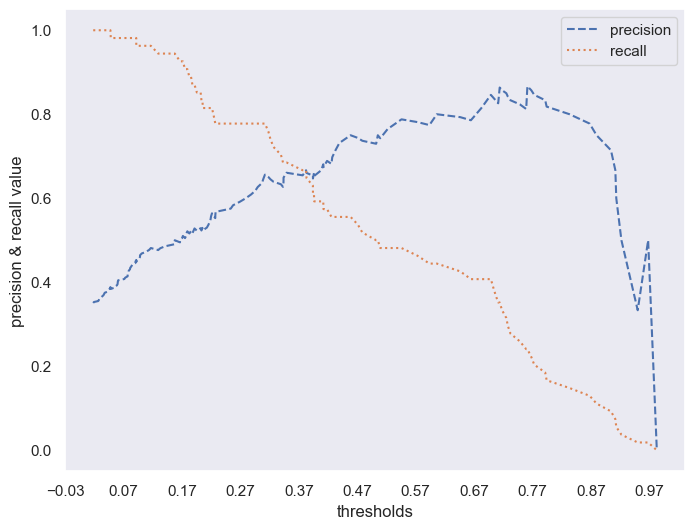

In [279]:
precision_recall_curve_plot(y_test, ss_pp)

# MinMax

In [280]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y_test, mm_pp):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, mm_pp)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

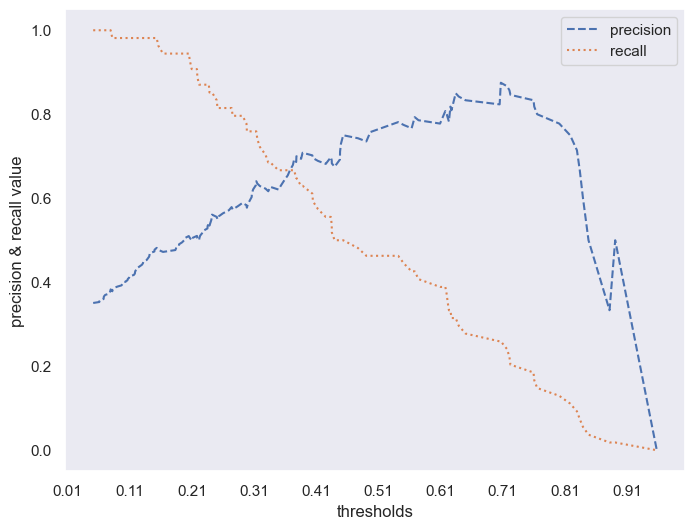

In [281]:
precision_recall_curve_plot(y_test, mm_pp)

# Robuster

In [282]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y_test, ru_pp):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, ru_pp)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel("thresholds")
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

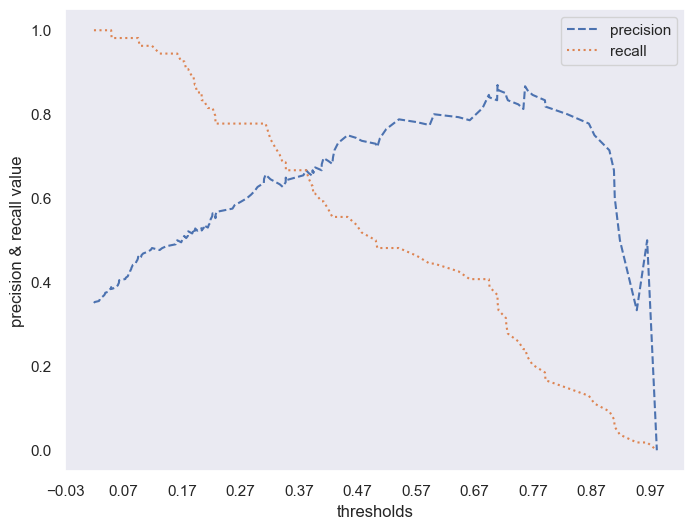

In [283]:
precision_recall_curve_plot(y_test, ru_pp)

### 2. "SkinThickness", "BloodPressure", "Insulin", "Age" 컬럼 제거

In [284]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y1_test, ss1_pp):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y1_test, ss1_pp)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel("thresholds")
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

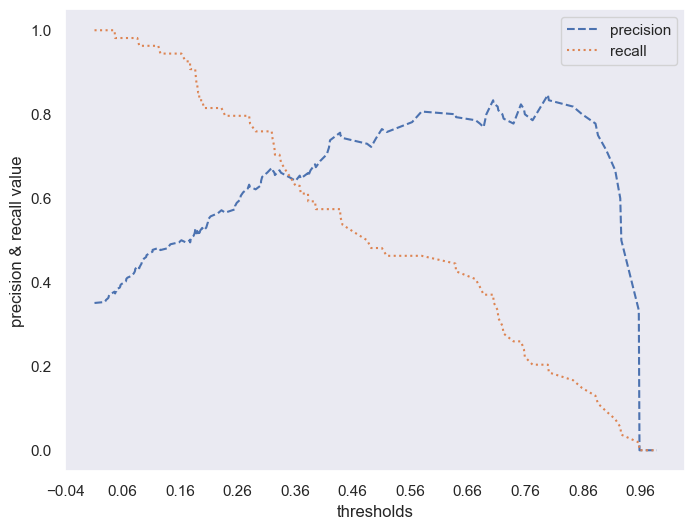

In [285]:
precision_recall_curve_plot(y1_test, ss1_pp)

In [286]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y1_test, mm1_pp):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y1_test, mm1_pp)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel("thresholds")
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

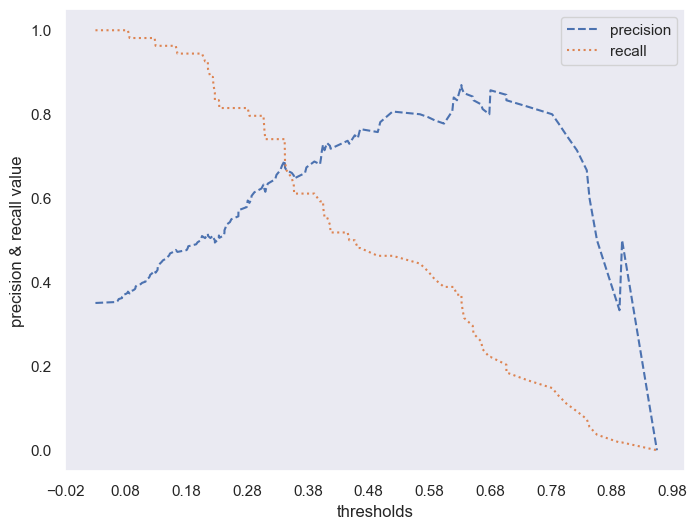

In [287]:
precision_recall_curve_plot(y1_test, mm1_pp)

In [288]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y1_test, ru1_pp):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y1_test, ru1_pp)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel("thresholds")
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

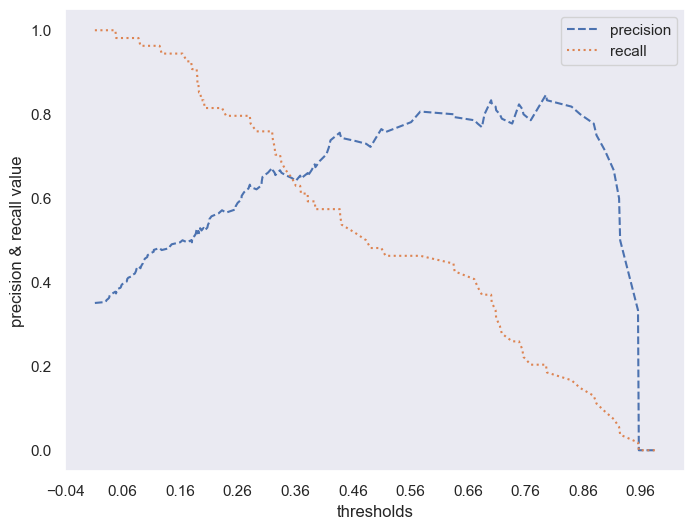

In [289]:
precision_recall_curve_plot(y1_test, ru1_pp)